# HR Analytics Project- Understanding the Attrition in HR

## Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

## HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.


## Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.


## Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


## Requirement
How does HR Analytics help in analyzing attrition? 

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
df_attrition=pd.read_csv("C:\data science\Evaluation Project\csv files\hr attrition.csv")
#pd.options.display.max_columns = 35

In [3]:
df_attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df_attrition.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


## Starting the EDA

In [5]:
# Checking Configuration of Dataset
df_attrition.shape

(1470, 35)

Obs- Its a huge data set that contains data of 1470 employees, with 35 attributes

In [6]:
df_attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Obs- Here 'Attrition' is our target column, while all others are attributes associated with the employee and are inputs

In [7]:
# Checking data types of attributes
df_attrition.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Obs- 
* The dataset consist of attributes that are continuous as well as categorical, the target column is categorical, thus we will have to build classification model.
* We will also have to encode the categorical data in future steps.

In [8]:
# Checking for null values if any
df_attrition.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Obs- There is no null data present in the dataset

In [9]:
# Checking for white spaces
#pd.options.display.max_rows = 1470
df_attrition.loc[0:]==" "

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Obs- There are no white spaces in the data(Checked through display all rows and columns, later changed the setting because of bigger file size)

In [10]:
#Check for duplicate data
df_attrition.duplicated().sum()

0

Obs- There is no duplicate data in the dataset

In [11]:
#Checking unique value of all columns
df_attrition.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Obs- The target column has 2 unique values(that means its a bianry classification problem).
* The columns('Employee Count','Over 18','Standard Hours') have only single value in them, and hence will not add anything to target prediction, so will be deleting them further.
* The Column 'EmployeeNumber' have all unique values and is not necessary, so we will be deleting that too

#### Deleting Single Entry & Unwanted Columns (Feature Engineering)

In [12]:
single=['EmployeeCount','Over18','StandardHours']
df_attrition.drop(single,axis=1,inplace=True)

In [13]:
df_attrition.shape

(1470, 32)

In [14]:
df_attrition.drop('EmployeeNumber',axis=1,inplace=True)

In [15]:
df_attrition.shape

(1470, 31)

In [16]:
# Creating data frame for Continuous Columns

attr_cont=df_attrition.select_dtypes(exclude='object')

attr_cont.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [17]:
attr_cont.shape

(1470, 23)

In [18]:
# Ctreating dataframe for categorical Columns
cat=df_attrition.select_dtypes(include='object')

attr_cat=pd.DataFrame(cat)
attr_cat.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [19]:
attr_cat.shape

(1470, 8)

In [20]:
#Checking description of dataset
df_attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Obs- 
* We can see the mean in all columns is either  very slightly greater than or leasser than median, thus we can say left and right skewness is present in almost all columns.
* We can also observe the max of most columns is excepttionaly higher than 75% ,and can say therefore the dataset contains outliers

## Visualization

### Univariate Visualization

In [21]:
# Count plot to check individual value counts of Attributes 

No     1233
Yes     237
Name: Attrition, dtype: int64


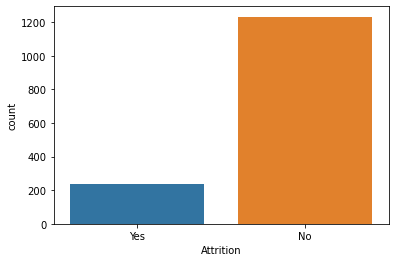

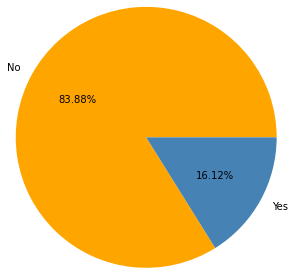

In [22]:
print(df_attrition['Attrition'].value_counts())

sns.countplot(df_attrition['Attrition'])

labels = 'No','Yes'
fig, ax = plt.subplots()
ax.pie(df_attrition['Attrition'].value_counts(),labels = labels, radius=1.5,autopct='%1.2f%%',colors=['orange','steelblue'])
plt.show()

Obs- Out of the total 1470, No Attrition Count is- 1233 and Yes Attrition Count is 237 and the percentage of attrition is 16.12%
* The imbalanced classes will be balanced by over-sampling later

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


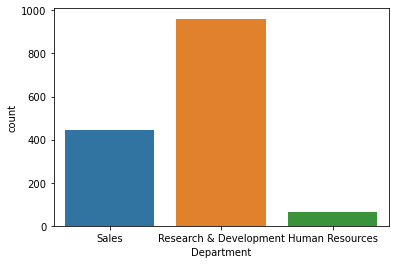

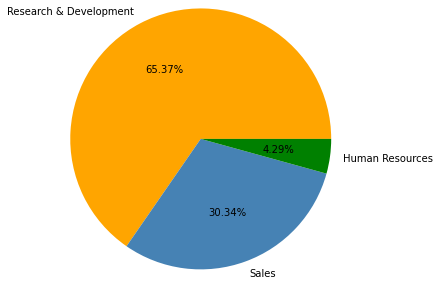

In [23]:
print(df_attrition['Department'].value_counts())

sns.countplot(df_attrition['Department'])

labels = 'Research & Development','Sales','Human Resources'
fig, ax = plt.subplots()
ax.pie(df_attrition['Department'].value_counts(),labels = labels, radius=1.5,autopct='%1.2f%%',colors=['orange','steelblue','green'])
plt.show()

Obs- The firm has most employees under "Research and Development" (66.37%), Followed by "Sales"(30.34%) and least under "Human Resources(4.29%)"

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

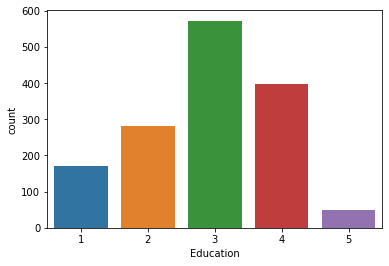

In [24]:
print(df_attrition['Education'].value_counts())

sns.countplot(df_attrition['Education'])

Obs- Max Employees(Since max employee are in R&D) have level 3 education, many of them have level 4 education too, a few have gathered level 5 education too

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


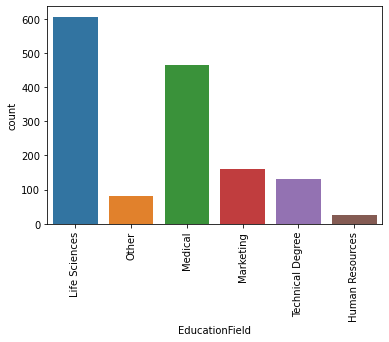

In [25]:
print(df_attrition['EducationField'].value_counts())

sns.countplot(df_attrition['EducationField'])
plt.xticks(rotation=90)
plt.show()

Obs- A total of 606 Employess have their Education Field as "LifeSciences", 464 as "Medical", and other fields of Employees being "Marketing","TechnicalDegree","HumanResources"

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

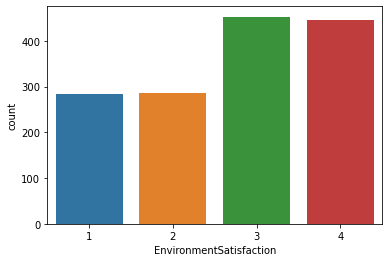

In [26]:
print(df_attrition['EnvironmentSatisfaction'].value_counts())

sns.countplot(df_attrition['EnvironmentSatisfaction'])

Obs- A very good number of employees have Environment satisfaction of 4 and 3, Some have average satisfaction of 2, while ,284 employees have least satisfaction of 1

Male      882
Female    588
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

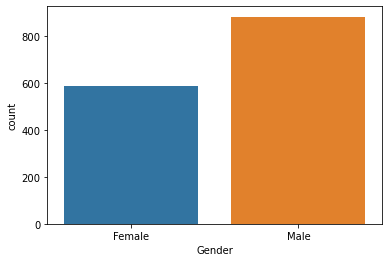

In [27]:
print(df_attrition['Gender'].value_counts())

sns.countplot(df_attrition['Gender'])

Obs- The male employees ratio is quite high in the firm

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64


<AxesSubplot:xlabel='JobLevel', ylabel='count'>

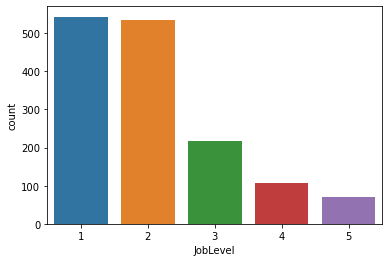

In [28]:
print(df_attrition['JobLevel'].value_counts())

sns.countplot(df_attrition['JobLevel'])

Obs- Maximum Employees(Since its a research firm) have level 1 and level 2 Job level

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


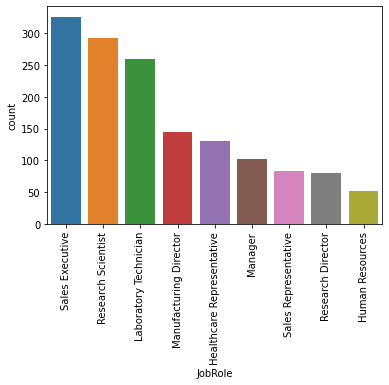

In [29]:
print(df_attrition['JobRole'].value_counts())

sns.countplot(df_attrition['JobRole'])
plt.xticks(rotation=90)
plt.show()

Obs- The number of Employees with position "Sales Executive" is the highest, followed by "Research Scientist","Laboratory Technician", and so on, while the least number of Employees have job role "Human Resources"

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

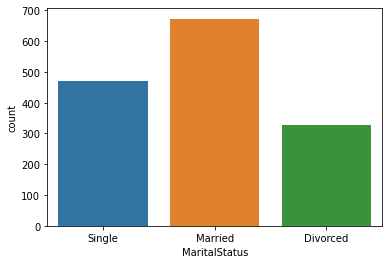

In [30]:
print(df_attrition['MaritalStatus'].value_counts())

sns.countplot(df_attrition['MaritalStatus'])

Obs- Many of the Employees are Married, There are many unmarried and Divorced employees too

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64


<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

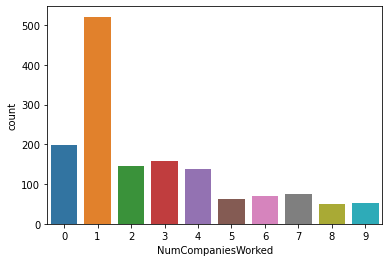

In [31]:
print(df_attrition['NumCompaniesWorked'].value_counts())

sns.countplot(df_attrition['NumCompaniesWorked'])

Obs- Having a great count of 521 employees who have worked in just 1 firm, shows they really believe in retaining their employees, and there are only few employees in the firm who shift their job frequently or have worked with more than 6-9 companies

No     1054
Yes     416
Name: OverTime, dtype: int64


<AxesSubplot:xlabel='OverTime', ylabel='count'>

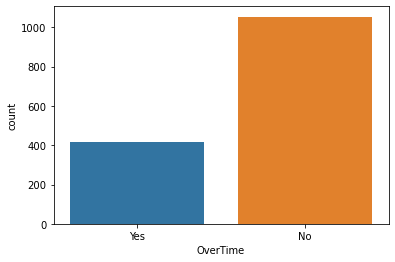

In [32]:
print(df_attrition['OverTime'].value_counts())

sns.countplot(df_attrition['OverTime'])

Obs- Most of the employees are not involved in doing over-time

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64


<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

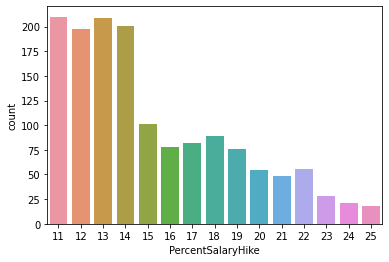

In [33]:
print(df_attrition['PercentSalaryHike'].value_counts())

sns.countplot(df_attrition['PercentSalaryHike'])

Obs- A minimum of 11% hike is been provided to major employees, followed by 12-14%, And nearly in equal proportion hike of 16-21 is also provided to many employees and a few of them have also been aareded with 22-25% hike

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64


<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

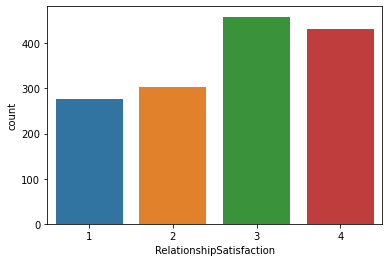

In [34]:
print(df_attrition['RelationshipSatisfaction'].value_counts())

sns.countplot(df_attrition['RelationshipSatisfaction'])

Obs- Even though many of the employees have "Relationship Satisfaction", there are many those are lacking it

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64


<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

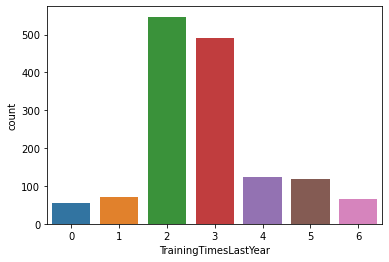

In [35]:
print(df_attrition['TrainingTimesLastYear'].value_counts())

sns.countplot(df_attrition['TrainingTimesLastYear'])

Obs- The employees do keep them updated by attending trainings, a good number of 2 and 3 proves this

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

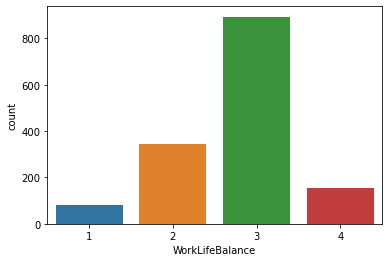

In [36]:
print(df_attrition['WorkLifeBalance'].value_counts())

sns.countplot(df_attrition['WorkLifeBalance'])

Obs- Maximum Employees do scale them on level 3 in maintaining WorkLife Balance

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

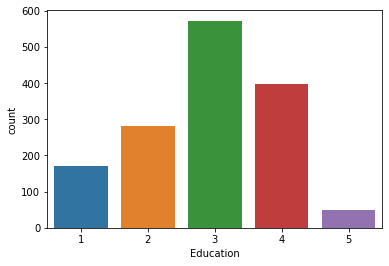

In [37]:
print(df_attrition['Education'].value_counts())

sns.countplot(df_attrition['Education'])

<AxesSubplot:xlabel='HourlyRate'>

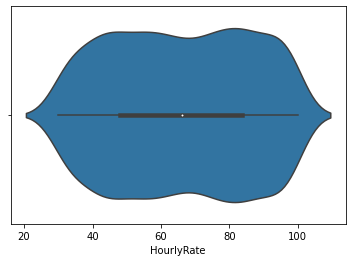

In [38]:
sns.violinplot(df_attrition['HourlyRate'])

Obs- A minimum 40 Hourly rate is provided to many employees, while 80-100 is also provided to few employees too

<AxesSubplot:xlabel='MonthlyIncome'>

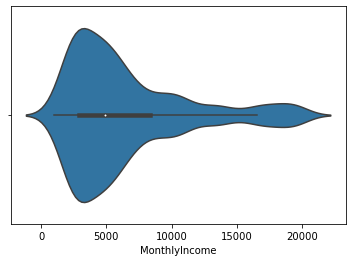

In [39]:
sns.violinplot(df_attrition['MonthlyIncome'])

Obs- The Monthly Income of most empployees fall nearly 3500 and a few are provided with max 20000 too.

<AxesSubplot:xlabel='TotalWorkingYears'>

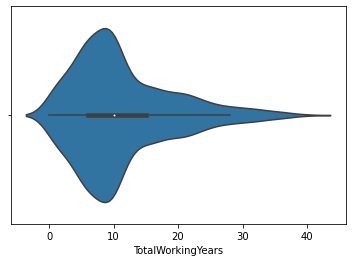

In [40]:
sns.violinplot(df_attrition['TotalWorkingYears'])

Obs- Most ot the employee have over 9 years of experience and few even havinh more than 30 years of experience

<AxesSubplot:xlabel='YearsAtCompany'>

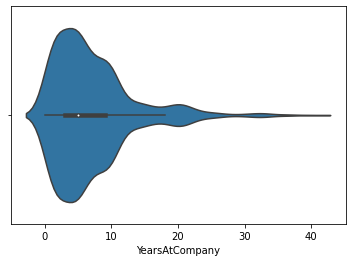

In [41]:
sns.violinplot(df_attrition['YearsAtCompany'])

Obs- Majority of the employees have served over 3 years at this company while a few who are there in company from more than 20 years

<AxesSubplot:xlabel='YearsSinceLastPromotion'>

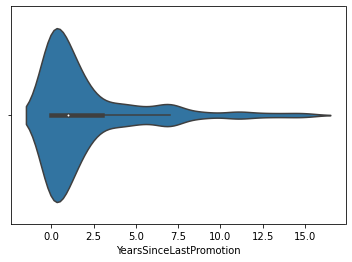

In [42]:
sns.violinplot(df_attrition['YearsSinceLastPromotion'])

Obs- We can see the promotions are given to the employees very frequently in span of 1 year. Very few of them have not got promotion from last 3 years

In [43]:
# Distribution plot to check skewness in the features

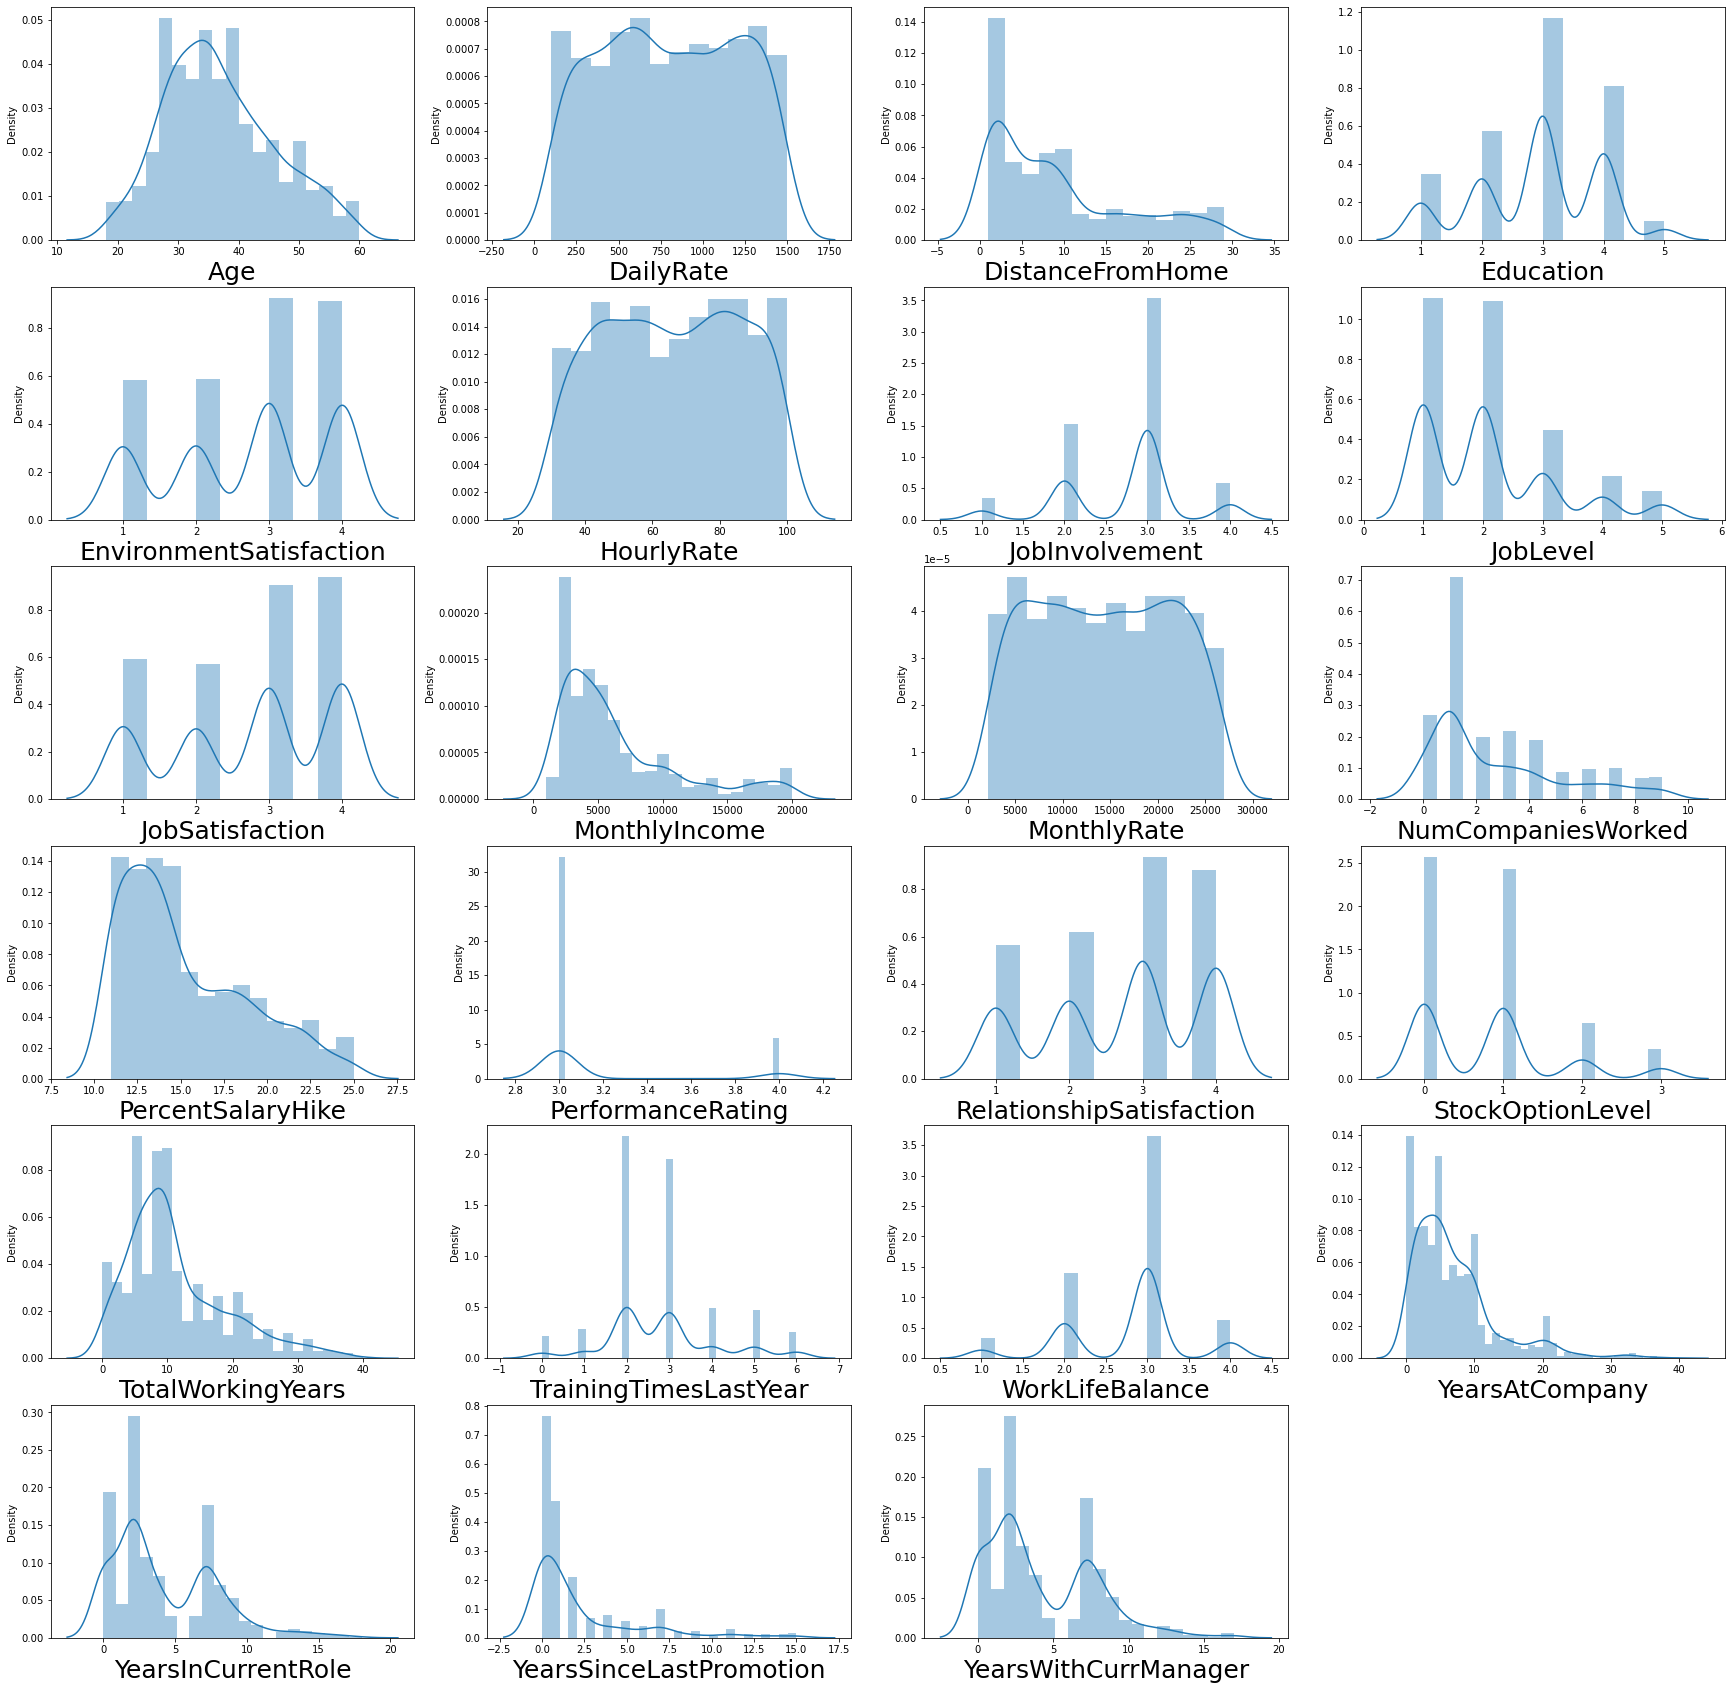

<Figure size 2160x2160 with 0 Axes>

In [44]:
plt.figure(figsize=(30,30))
plotnumber=1

#col=['Age', 'DailyRate','DistanceFromHome', 'Education','EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate','JobInvolvement', 'JobLevel', 'JobSatisfaction','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
     
for column in attr_cont: # We have created cont columns data frame above
    if plotnumber<=24: #as there are 24 continuous columns 
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(attr_cont[column])
        plt.xlabel(column,fontsize=25)
    plotnumber +=1
plt.show()

plt.figure(figsize=(30,30))
plotnumber=1


Obs- We can see a little skewness present in almost all columns, we would be treating it later

In [45]:
#box plot to check outliers

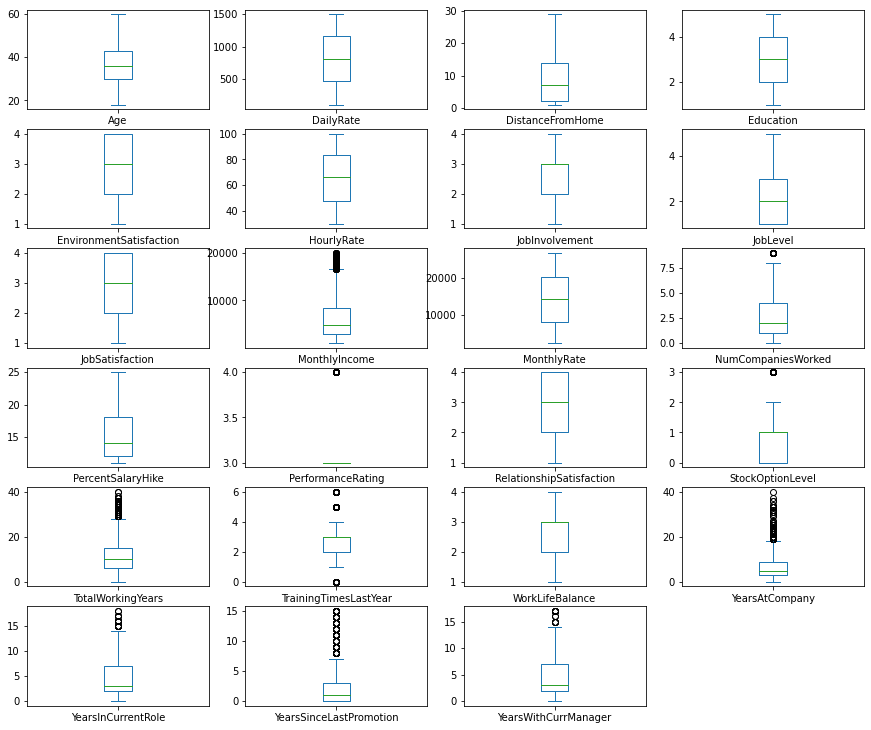

In [46]:
df_attrition.plot(kind='box',subplots=True,layout=(7,4),figsize=(15,15))
plt.show()

Obs- We can see outliers are present in columns: 'MonthlyIncome','NumCompaniewWorked','PerformanceRating','StockOptionLevel','TotalWorkingYears','TrainingTimeLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPrompotion','YearswithCurManager'

### Bivariate and Multivariate Visualization

In [47]:
# Target(Attrition) vs Continuous Column

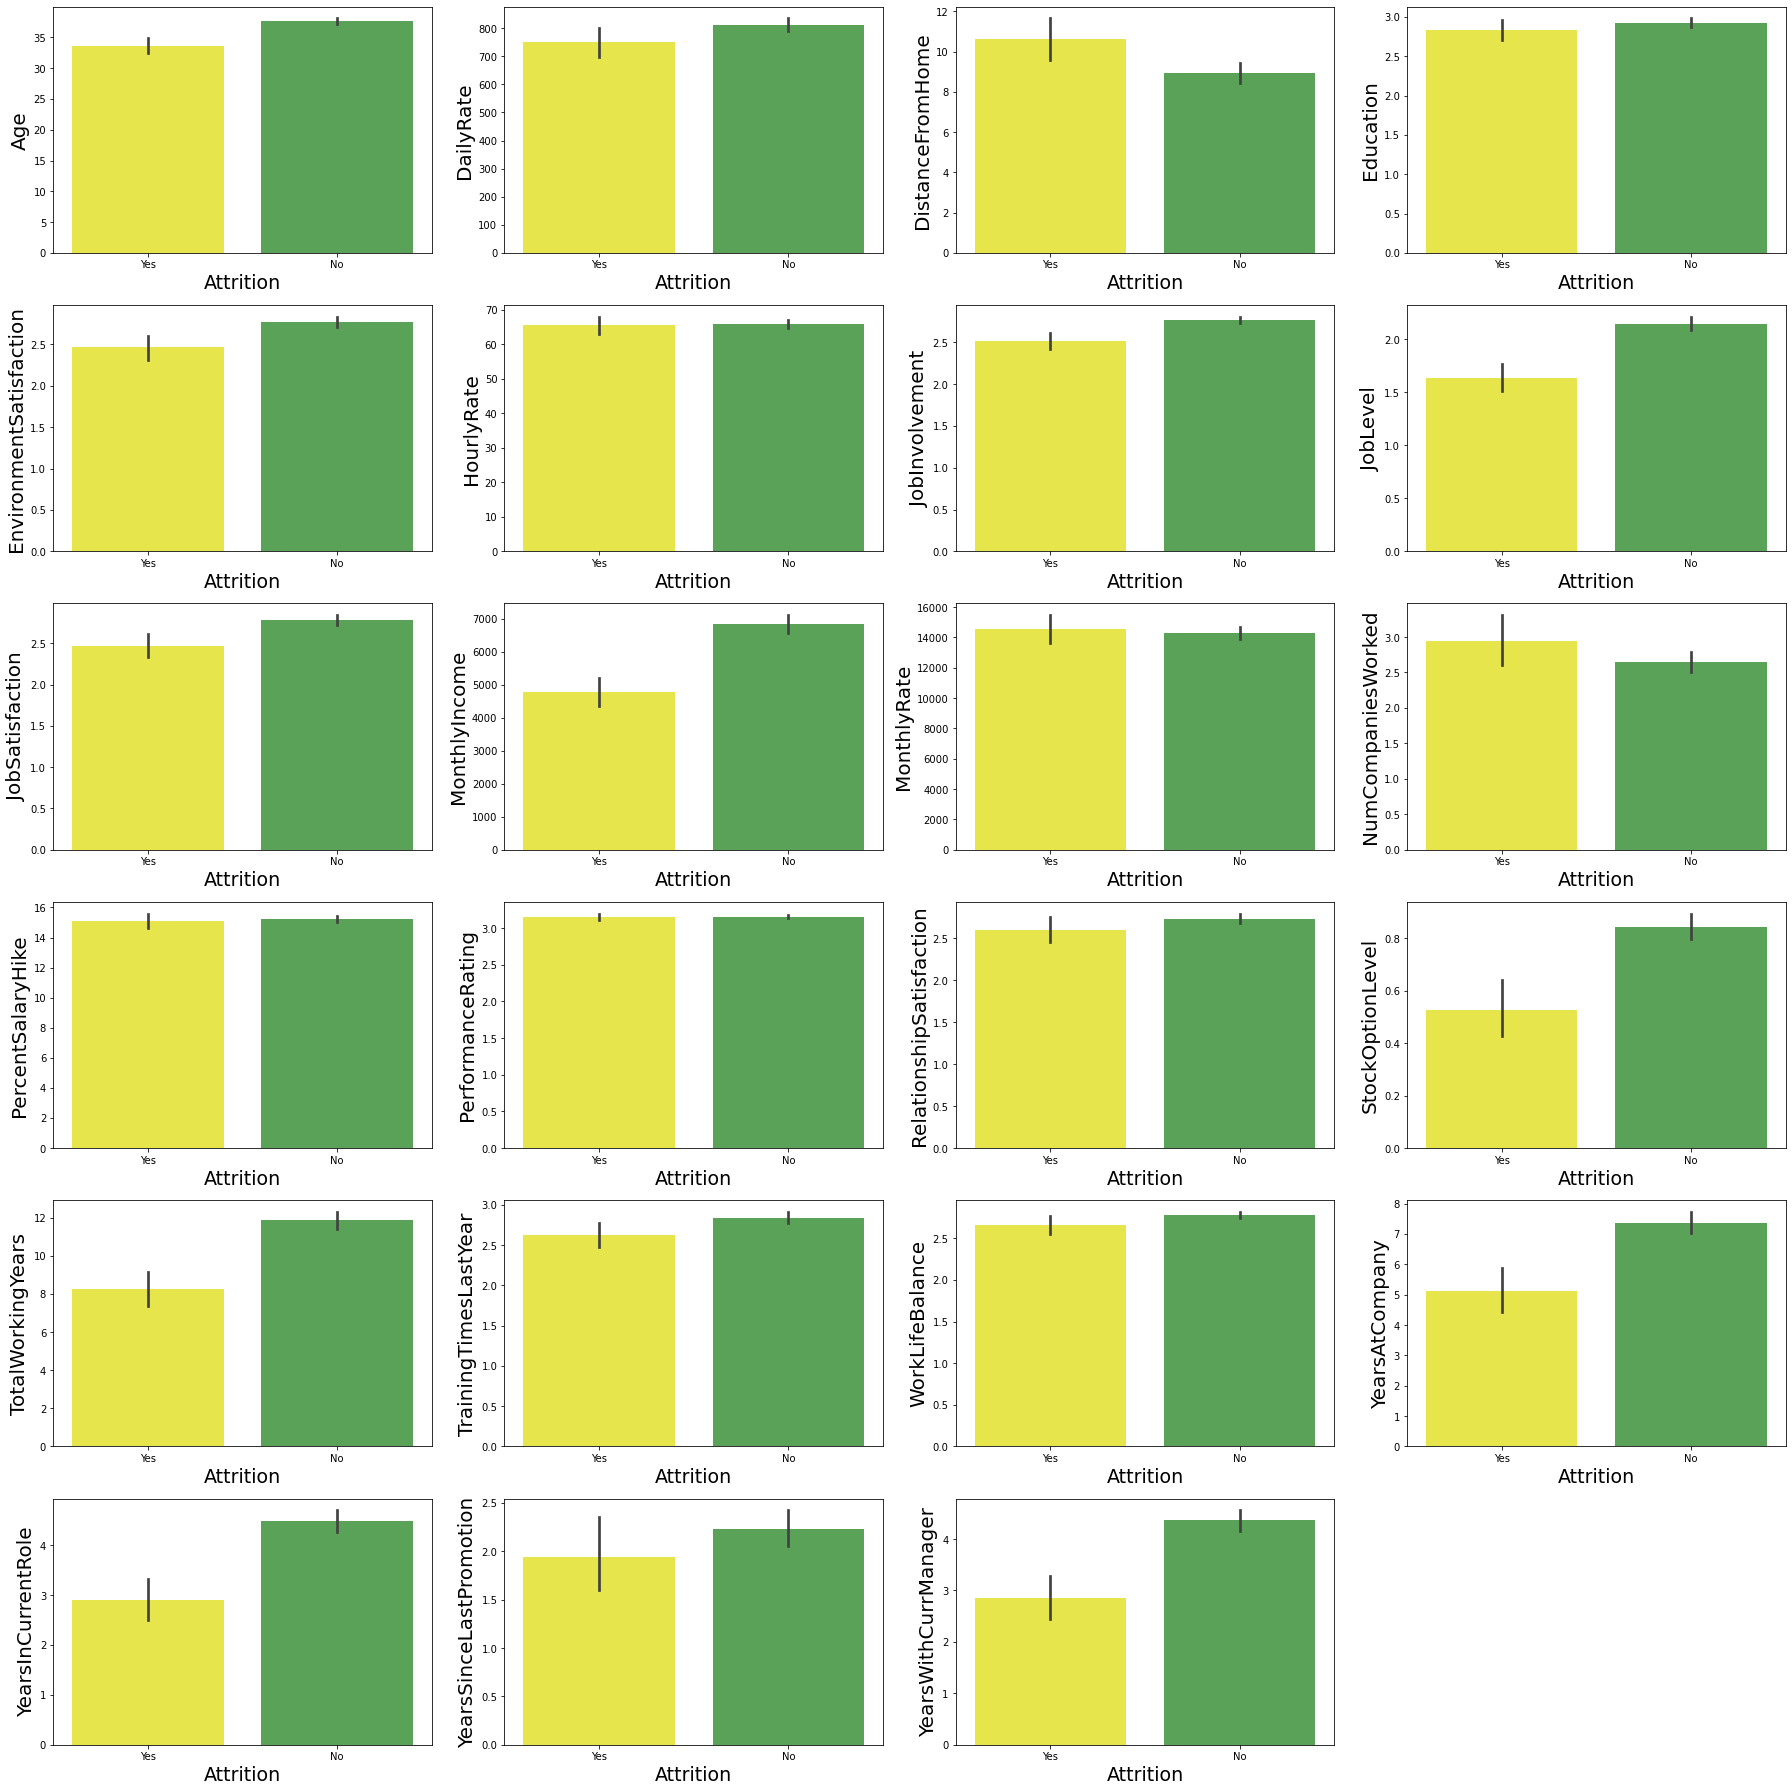

In [48]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
op1 = df_attrition['Attrition']
ip9=attr_cont
for col in ip9:
    if plotnum<=25:
        plt.subplot(6,4,plotnum)
        sns.barplot(op1,ip9[col],palette='Set1_r')
        plt.xlabel('Attrition',fontsize=19)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

obs-
* Employees with less-age aids towards more towards attrition.
* For Employee those have less rate are aids more towards attrition
* More distance from home is also reason of attrition for many
* Education isn't the major factor for attrition
* Employess who are not satisfied with the working Environment aids in attrition.
* In a similar way factors that aids more towards attrition are: 'MonthlyRate','NumCompaniesWorked'
* And the factors that aids more towards retention are: 'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','StockOptionLevel','TotalWorkingYears','YearsInCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearswithCurrentManager'

In [49]:
# Target(Attrition) vs Discrete or Categorical Columns

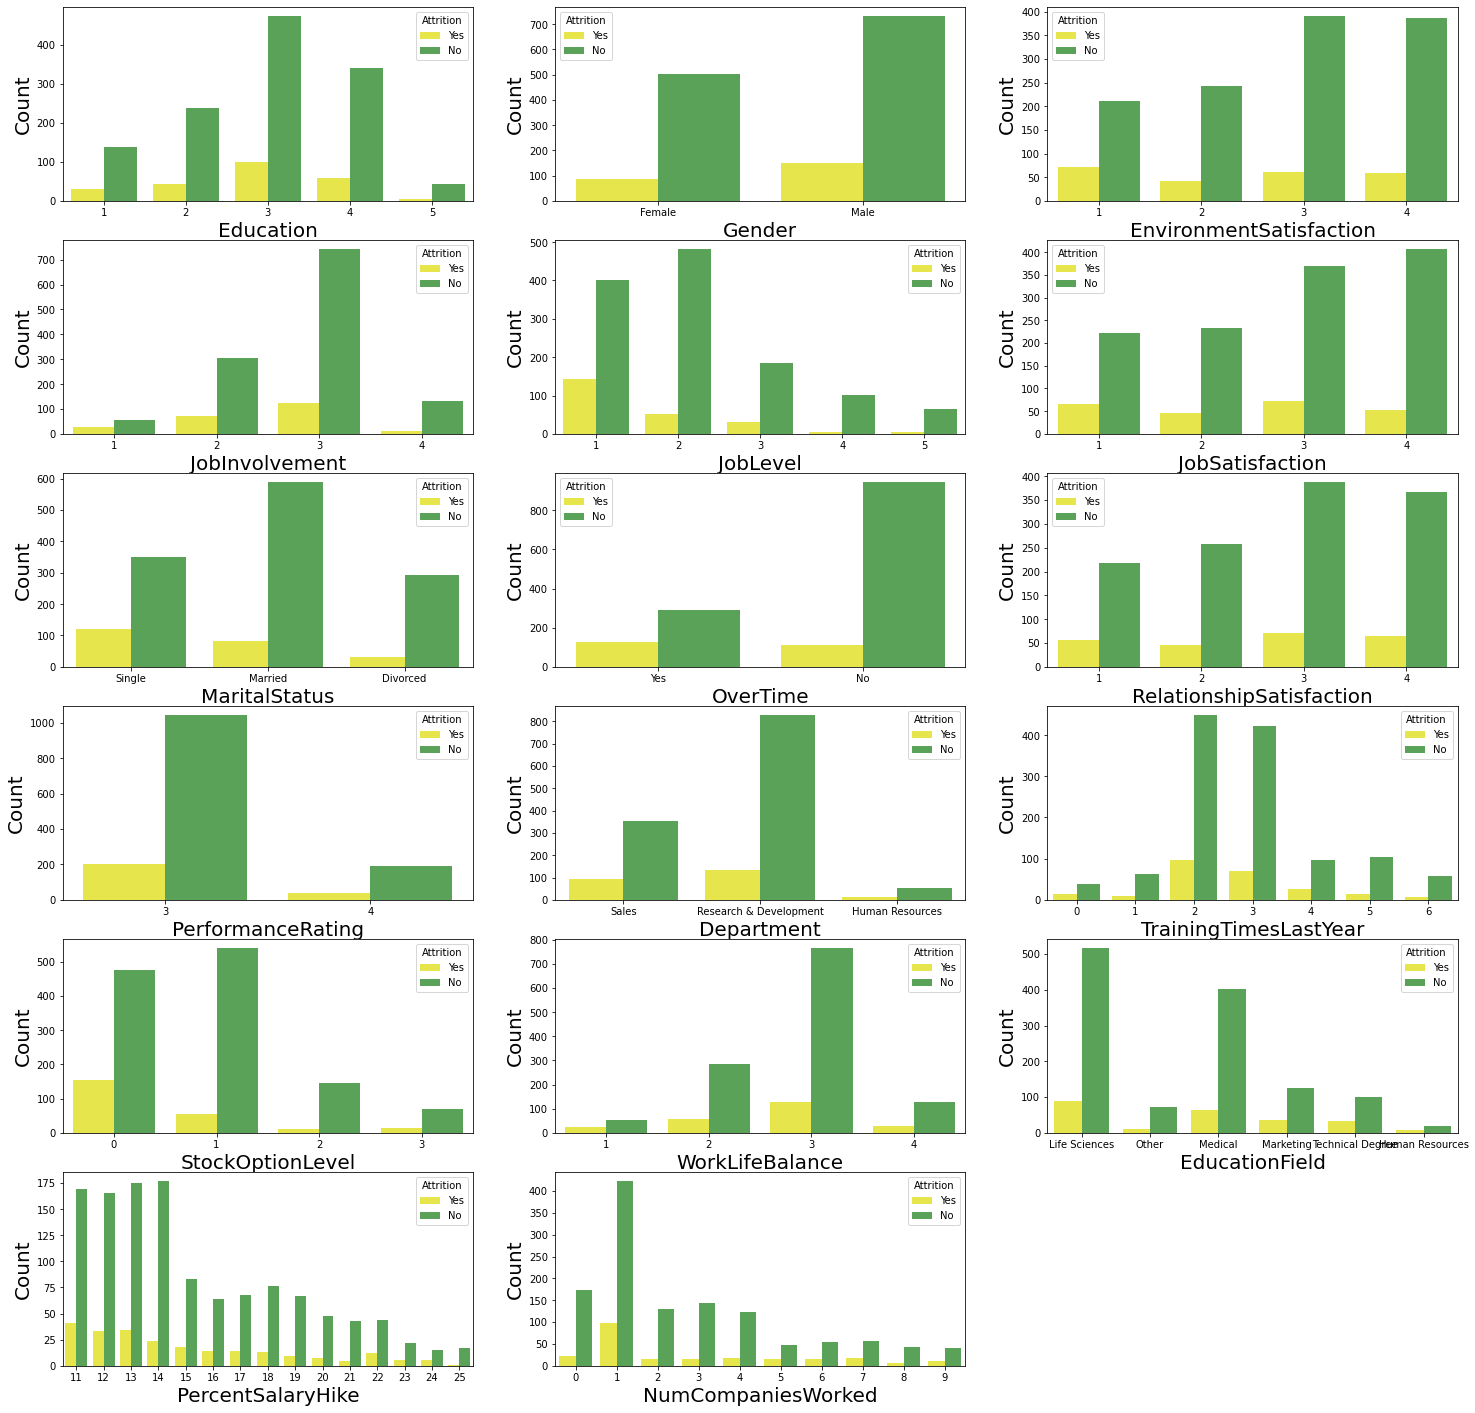

In [50]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
ip2 = df_attrition[['Education','Gender','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','MaritalStatus','OverTime','RelationshipSatisfaction','PerformanceRating','Department','TrainingTimesLastYear','StockOptionLevel','WorkLifeBalance','EducationField','PercentSalaryHike','NumCompaniesWorked']]
op2= df_attrition['Attrition']
for col in ip2:
    if plotnum<=18:
        plt.subplot(6,3,plotnum)
        sns.countplot(ip2[col],hue =op2,palette='Set1_r')
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1

Obs- We can see count-wise attrition of Yes and No of multiple features.

<AxesSubplot:xlabel='Department', ylabel='MonthlyIncome'>

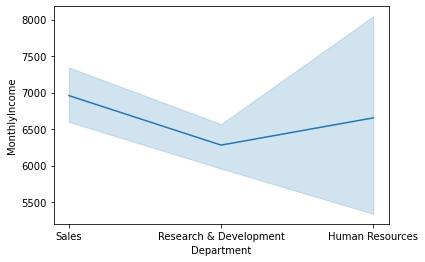

In [51]:
sns.lineplot(x=df_attrition['Department'],y=df_attrition['MonthlyIncome'], data=df_attrition)

Obs- We can see the Monthly Income of Sales department is the highest and then of Research&Development Department followed by Human Resources Department

<AxesSubplot:xlabel='Education', ylabel='HourlyRate'>

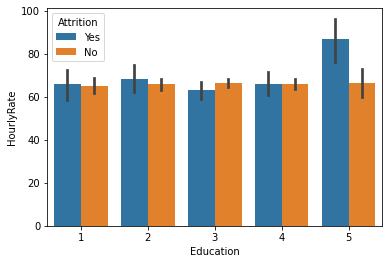

In [53]:
sns.barplot(x=df_attrition['Education'],y=df_attrition['HourlyRate'],hue=df_attrition['Attrition'], data=df_attrition)

Obs- level 5 Education aids more towards attrition, while for all other levels attrition is same

<AxesSubplot:xlabel='EducationField', ylabel='DailyRate'>

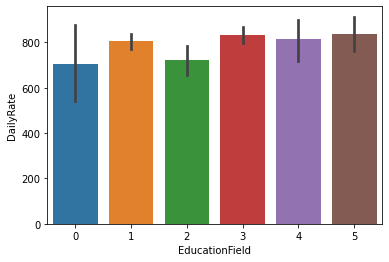

In [146]:
sns.barplot(x=df_attrition['EducationField'],y=df_attrition['DailyRate'], data=df_attrition)


Obs- Level 5 has the highest daily Rate and least daily rate is of level 0

<AxesSubplot:xlabel='YearsAtCompany', ylabel='MonthlyIncome'>

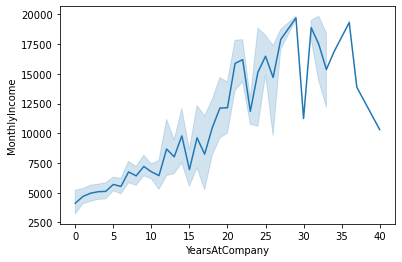

In [55]:
sns.lineplot(x=df_attrition['YearsAtCompany'],y=df_attrition['MonthlyIncome'], data=df_attrition)

Obs- We can see an increasing MonthlyIncome with more no. of YearsatCompany

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='PerformanceRating'>

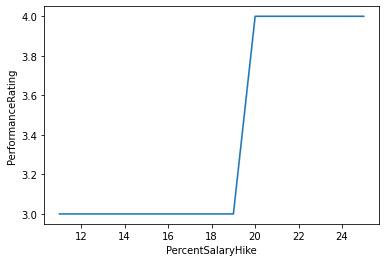

In [56]:
sns.lineplot(x=df_attrition['PercentSalaryHike'],y=df_attrition['PerformanceRating'], data=df_attrition)

Obs- PercentSalaryHike is steady when performance is at level 3.0, but it steeps rapidly after that

## Checking Correlation

In [57]:
df_attrition.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


<AxesSubplot:>

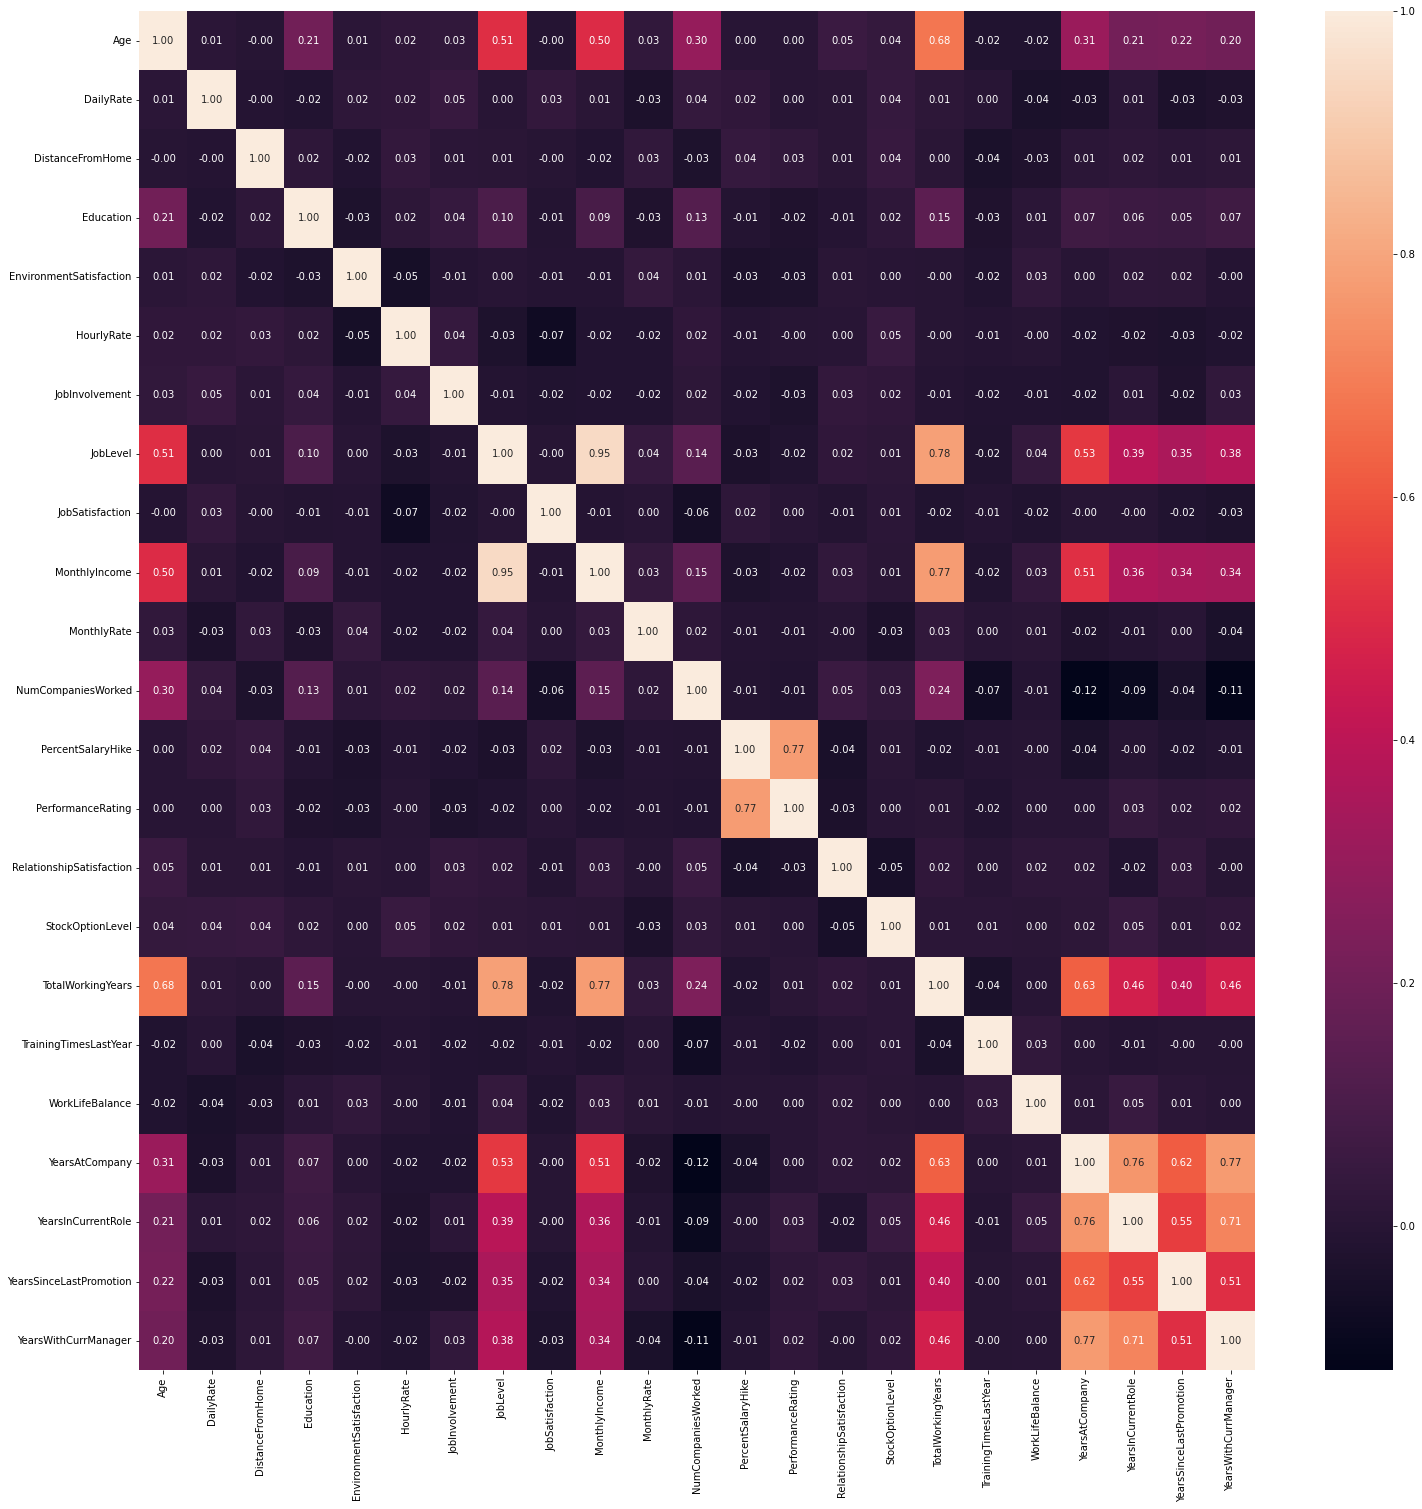

In [58]:
# Correlation using heatmap
plt.figure(figsize=(25,25))
sns.heatmap(df_attrition.corr(),annot=True,fmt='0.2f')

Obs- We can clearly see there is very little correlation between the columns and whatever little, it is negative. 

* highly positive correlated columns(>=0.7):('Age and TotalWorkingYears'),('JobLevelandMonthlyIncome'),('JobLevel and TotalWorkingYears'),('MonthlyIncome and TotalWorkingYears'),('PercentSalaryHike and PerformanceRating')
* positive correlated columns(>=0.4):('Age and JobLevel'),('Age and MonthlyIncome'),('JobLevel and YearsAtCompany'),('MonthlyIncome and YearsAtCompany')('YearsAtCompany and TotalWorkingYears')
* highly negative correlated columns:Most other columns are highly negatively correlated
* We will be checking for multi-collinearity too later

## Data Pre-Processing & Transformation

### Encoding Categorical Data

In [59]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
cat_col=attr_cat.columns # We have already created categorical dataframe earlier
df_attrition[cat_col]=df_attrition[cat_col].apply(le.fit_transform)
df_attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


### Detecting Outliers and Treating them

In [60]:
#Method 1: Z-Score
from scipy.stats import zscore
z=np.abs(zscore(df_attrition))
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 

Obs- We can observe outliers are present at these many loactions

In [61]:
df_attrition_new=df_attrition[(z<3).all(axis=1)]

In [62]:
print("df_attrition.shape:",df_attrition.shape, "\ndf_attrition_new.shape:",df_attrition_new.shape)

df_attrition.shape: (1470, 31) 
df_attrition_new.shape: (1387, 31)


In [63]:
# Checking data loss
data_loss=(1470-1387)/1470*100
data_loss

5.646258503401361

In [64]:
# Method 2: IQR(Inter Quartile) Method
Q1=df_attrition.quantile(0.25)
Q3=df_attrition.quantile(0.75)
IQR=Q3 - Q1

df_attrition_new2=df_attrition[~((df_attrition < (Q1 - 1.5 * IQR)) |(df_attrition > (Q3 + 1.5 * IQR))).any(axis=1)]

In [65]:
print("df_attrition.shape:",df_attrition.shape, "\ndf_attrition_new2.shape:",df_attrition_new2.shape)

df_attrition.shape: (1470, 31) 
df_attrition_new2.shape: (641, 31)


In [66]:
# Checking data loss
data_loss2=(1470-641)/1470*100
data_loss2

56.394557823129254

Obs- The data loss through quantile method is very high, so we will be going through Z-Score method

In [67]:
# Reassigning obtained value to original dataframe
df_attrition=df_attrition_new
df_attrition.shape

(1387, 31)

### Seperating Input and Target variables

In [68]:
x=df_attrition.drop(columns='Attrition')
y=df_attrition['Attrition']

In [69]:
x.shape

(1387, 30)

In [70]:
y.shape

(1387,)

### Checking for Skewness

In [71]:
x.skew()

Age                         0.472280
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
Y

We can see data is skewed in many columns "BusinessTravel","DistanceFromHome","EducationField","JobLevel","MonthlyIncome","NumCompaniesWorked","OverTime","PercentSalaryHike","PerformanceRating","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"

Transforming the data and re-checking the skewness

### Applying Transformation Method

In [72]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

skew_col = ["BusinessTravel","DistanceFromHome","EducationField","JobLevel","MonthlyIncome","NumCompaniesWorked","OverTime","PercentSalaryHike","PerformanceRating","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]
x[skew_col]= pt.fit_transform(x[skew_col].values)

In [73]:
x.skew()

Age                         0.472280
BusinessTravel             -0.960583
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome           -0.008149
Education                  -0.289024
EducationField             -0.008642
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.110769
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.027700
MonthlyRate                 0.030596
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.011133
YearsAtCompany             -0.025230
Y

Obs- * We can see skewness is removed from all the columns, except BusinessTravel and StockOptionLevel
* Tried re-transforming these two columns, but with log_transform the data was getting converted to zero, with sqrt transformation it was giving NaN values, so going forward with the current skewed-x only

### Checking Multi-Collinearity

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
def vif_cal():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

vif_cal()

    VIF Factor                  Features
0    25.613294                       Age
1     1.014413            BusinessTravel
2     4.935715                 DailyRate
3    14.139157                Department
4     1.017602          DistanceFromHome
5     9.104572                 Education
6     1.027366            EducationField
7     6.953683   EnvironmentSatisfaction
8     2.520222                    Gender
9    10.789291                HourlyRate
10   14.327992            JobInvolvement
11    5.969497                  JobLevel
12    8.624044                   JobRole
13    6.998000           JobSatisfaction
14    5.538143             MaritalStatus
15    5.842989             MonthlyIncome
16    5.003284               MonthlyRate
17    1.417736        NumCompaniesWorked
18    1.026402                  OverTime
19    1.015261         PercentSalaryHike
20         NaN         PerformanceRating
21    7.052188  RelationshipSatisfaction
22    3.201096          StockOptionLevel
23    3.935550  

Obs- 
* Keeping the acceptable VIF factor range as 10, we can see VIF of Age,Department,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement to be high. 
* However none of these columns have strong correlation with each other and therefore we will be not deleting any of these columns
* Will go further with Model Building with PCA approach as well

### Checking for Imbalance

In [76]:
print(y.value_counts())

0    1158
1     229
Name: Attrition, dtype: int64


Obs-We can see the target is imbalanced, and therefore we need to balance it.

### Oversampling using SMOTE

pip install imblearn

In [77]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y= SM.fit_resample(x,y)

In [78]:
print(y.value_counts())

1    1158
0    1158
Name: Attrition, dtype: int64


Obs- The target valueas are now balanced

## Data Modelling

We will make two models:

* 1.Without PCA
* 2.Using PCA(to remove curse of dimensionality)

## Model1(Without PCA)

In [79]:
#Finding Best Random State

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state =i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.846286701208981  on Random_state  117


### Splitting data into Train-Test

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=117)

In [148]:
x_train.shape

(1737, 30)

In [149]:
y_train.shape

(1737,)

In [150]:
x_test.shape

(579, 30)

In [151]:
y_test.shape

(579,)

### Using various Machine Learning Algorithms

In [152]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### 1. Logistic Regression

In [153]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predlg))
print("Confusion Matrix:\n",confusion_matrix(y_test,predlg))
print("Classification Report:\n",classification_report(y_test,predlg))

Accuracy: 0.846286701208981
Confusion Matrix:
 [[249  39]
 [ 50 241]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       288
           1       0.86      0.83      0.84       291

    accuracy                           0.85       579
   macro avg       0.85      0.85      0.85       579
weighted avg       0.85      0.85      0.85       579



Obs- The Logistic Regression has provided the accuracy_score:0.846286701208981 and f1-score:0.85

### 2. GaussianNB

In [88]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predgnb))
print("Confusion Matrix:\n",confusion_matrix(y_test,predgnb))
print("Classification Report:\n",classification_report(y_test,predgnb))

Accuracy: 0.7996545768566494
Confusion Matrix:
 [[236  55]
 [ 61 227]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       291
           1       0.80      0.79      0.80       288

    accuracy                           0.80       579
   macro avg       0.80      0.80      0.80       579
weighted avg       0.80      0.80      0.80       579



Obs- The GaussianNB has provided the accuracy_score:0.7996545768566494 and f1-score:0.80

### 3.Decision Tree Classifier

In [89]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,preddtc))
print("Confusion Matrix:\n",confusion_matrix(y_test,preddtc))
print("Classification Report:\n",classification_report(y_test,preddtc))

Accuracy: 0.8497409326424871
Confusion Matrix:
 [[239  52]
 [ 35 253]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85       291
           1       0.83      0.88      0.85       288

    accuracy                           0.85       579
   macro avg       0.85      0.85      0.85       579
weighted avg       0.85      0.85      0.85       579



Obs- The Decision Tree Classifier has provided the accuracy-score:0.8497409326424871 and f1-score:0.85

### 4.K Nearest Neighbor Classifier

In [90]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predknn))
print("Confusion Matrix:\n",confusion_matrix(y_test,predknn))
print("Classification Report:\n",classification_report(y_test,predknn))

Accuracy: 0.7426597582037997
Confusion Matrix:
 [[189 102]
 [ 47 241]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.65      0.72       291
           1       0.70      0.84      0.76       288

    accuracy                           0.74       579
   macro avg       0.75      0.74      0.74       579
weighted avg       0.75      0.74      0.74       579



Obs- The K Nearest Neighbor Classifier has provided the accuracy-score:0.7426597582037997 and f1-score:0.71

### 5.Support Vector Machine Classifier

In [91]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predsvc))
print("Confusion Matrix:\n",confusion_matrix(y_test,predsvc))
print("Classification Report:\n",classification_report(y_test,predsvc))

Accuracy: 0.5077720207253886
Confusion Matrix:
 [[172 119]
 [166 122]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.59      0.55       291
           1       0.51      0.42      0.46       288

    accuracy                           0.51       579
   macro avg       0.51      0.51      0.50       579
weighted avg       0.51      0.51      0.50       579



Obs- The Support Vector Machine Classifier has provided the accuracy-score: 0.5077720207253886 and f1-score:0.55

### 6. Ensemble Methods

#### 6.1 Random Forest Classifier

In [92]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predrf))
print("Confusion Matrix:\n",confusion_matrix(y_test,predrf))
print("Classification Report:\n",classification_report(y_test,predrf))

Accuracy: 0.9378238341968912
Confusion Matrix:
 [[285   6]
 [ 30 258]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       291
           1       0.98      0.90      0.93       288

    accuracy                           0.94       579
   macro avg       0.94      0.94      0.94       579
weighted avg       0.94      0.94      0.94       579



Obs- The Random Forest Classifier has provided the accuracy-score:0.9378238341968912 and f1-score:0.94

#### 6.2 Ada Boost Classifier

In [93]:
ad=AdaBoostClassifier(n_estimators=50,learning_rate=1.0)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predad))
print("Confusion Matrix:\n",confusion_matrix(y_test,predad))
print("Classification Report:\n",classification_report(y_test,predad))

Accuracy: 0.917098445595855
Confusion Matrix:
 [[262  29]
 [ 19 269]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       291
           1       0.90      0.93      0.92       288

    accuracy                           0.92       579
   macro avg       0.92      0.92      0.92       579
weighted avg       0.92      0.92      0.92       579



Obs- The Ada Boost Classifier has provided the accuracy-score: 0.917098445595855 and f1-score:0.92

#### 6.3 Gradient Boosting Classifier

In [94]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predgb))
print("Confusion Matrix:\n",confusion_matrix(y_test,predgb))
print("Classification Report:\n",classification_report(y_test,predgb))

Accuracy: 0.9343696027633851
Confusion Matrix:
 [[280  11]
 [ 27 261]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       291
           1       0.96      0.91      0.93       288

    accuracy                           0.93       579
   macro avg       0.94      0.93      0.93       579
weighted avg       0.94      0.93      0.93       579



Obs- The Gradient Boosting Classifier has provided the accuracy-score:0.9343696027633851 and f1-score:0.94

### Cross Validation

Obs- Selecting K value=6, since accuracy is same for all K's, but cv_score is high for k=6

In [155]:
# cv score for Logistic Regression 
cvlg=cross_val_score(lg,x,y,cv=5).mean()
print('CV score  for Logistic Reggerssion:',cvlg)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predlg)-cvlg)

CV score  for Logistic Reggerssion: 0.798397817829746
And Difference between CV and accuracy_score= 0.047888883379235025


In [156]:
# cv score for Gaussian NB 
cvgnb=cross_val_score(gnb,x,y,cv=5).mean()
print('CV score  for Gaussian NB:',cvgnb)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predgnb)-cvgnb)

CV score  for Gaussian NB: 0.77637968272883
And Difference between CV and accuracy_score= -0.2858788191709716


In [157]:
# cv score for Decision Tree Classifier 
cvdtc=cross_val_score(dtc,x,y,cv=5).mean()
print('CV score  for Decision Tree Classifier:',cvdtc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,preddtc)-cvdtc)

CV score  for Decision Tree Classifier: 0.8217760854993669
And Difference between CV and accuracy_score= -0.3364565690917676


In [158]:
# cv score for K Neighbors Classifier 
cvknn=cross_val_score(knn,x,y,cv=5).mean()
print('CV score  for K Neighbors Clssifier:',cvknn)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predknn)-cvknn)

CV score  for K Neighbors Clssifier: 0.7249636925597677
And Difference between CV and accuracy_score= -0.21891878755113214


In [159]:
# cv score for Support Vector Machine Classifier 
cvsvc=cross_val_score(svc,x,y,cv=5).mean()
print('CV score  for Support Vector Classifier:',cvsvc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predsvc)-cvsvc)

CV score  for Support Vector Classifier: 0.48403496685782377
And Difference between CV and accuracy_score= 0.018555706717305775


In [160]:
# cv score for Random Forest Classifier
cvrf=cross_val_score(rf,x,y,cv=5).mean()
print('CV score  for RandomForestClassifier:',cvrf)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predrf)-cvrf)

CV score  for RandomForestClassifier: 0.911591383034185
And Difference between CV and accuracy_score= -0.4452701395108689


In [161]:
# cv score for Ada Boost Classifier
cvad=cross_val_score(ad,x,y,cv=5).mean()
print('CV score  for Ada Boost Classifier:',cvad)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predad)-cvad)

CV score  for Ada Boost Classifier: 0.8679991807551947
And Difference between CV and accuracy_score= -0.3809525486308423


In [162]:
# GradientBoostingClassifier
cvgb=cross_val_score(gb,x,y,cv=5).mean()
print('CV score  for Gradiebt Boostin Classifier:',cvgb)
print("And Difference between CV and accuracy_score=",accuracy_score(y_test,predgb)-cvgb)

CV score  for Gradiebt Boostin Classifier: 0.8857181425485962
And Difference between CV and accuracy_score= -0.412488436158268


Obs-From the observation of accuracy and cross validation score and their difference we can predict that Logistic Regression is the best model from Model1

### Hyper Parameter Tuning

In [163]:
lg.get_params() # Getting Logistic Regression Parameters

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [165]:
#Selecting few parameter list to pass in Logistic Regression
from sklearn.model_selection import GridSearchCV
# defining parameter range
parameter = {'penalty':['l1', 'l2', 'elasticnet'],
             'C':[0.1,1.0,2.0],
             'random_state': [0,14,42,57,73],
             'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']} 

In [166]:
#Passing the parameters to LG
GCV = GridSearchCV(lg,parameter,cv=5,scoring='accuracy')

GCV.fit(x_train,y_train)  
print(GCV.best_params_)         #printing the best parameter found by Gridsearchcv
GCV_pred = GCV.best_estimator_.predict(x_test)    #predicting accuracy with obtained best parameter 
accuracy_score(y_test, GCV_pred)                  #Printing accuracy

{'C': 1.0, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}


0.8756476683937824

In [167]:
#Applying best parameter values on Logistic Regression Algorithm 
attrition_best=LogisticRegression(C= 1.0, penalty= 'l2', random_state= 0, solver= 'liblinear')
attrition_best.fit(x_train,y_train)
predlg1=attrition_best.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predlg1))
print("Confusion Matrix:\n",confusion_matrix(y_test,predlg1))
print("Classification Report:\n",classification_report(y_test,predlg1))

Accuracy: 0.8756476683937824
Confusion Matrix:
 [[254  34]
 [ 38 253]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       288
           1       0.88      0.87      0.88       291

    accuracy                           0.88       579
   macro avg       0.88      0.88      0.88       579
weighted avg       0.88      0.88      0.88       579



Obs-The Logistic Regression Algorithm has given accuracy_score:0.8756476683937824 after tuning

### Model2(With PCA)

In [108]:
from sklearn.decomposition import PCA

In [109]:
pc=PCA(n_components=15) # Selecting n_components as 15 as the columns are 30 and there is no much collinearity, so averaging of more than 2 columns will hamper the decision
x1=pc.fit_transform(x)
x1

array([[ 5.17147781e+03,  3.54521916e+02, -2.80835760e+01, ...,
        -2.63684901e+00,  1.79981875e-01, -1.33029365e+00],
       [ 1.06041730e+04, -4.36920903e+02,  3.52586746e+00, ...,
         1.58337400e+00, -2.51951832e-01,  9.73482960e-01],
       [-1.19128096e+04,  5.26117716e+02, -2.61087678e+01, ...,
        -1.50069921e+00,  6.75805305e-01, -1.40322283e+00],
       ...,
       [-5.01810915e+03, -8.97949570e+01, -2.84388722e+01, ...,
        -8.24519097e-01,  5.97007863e-01,  8.51097142e-02],
       [-1.12381987e+04,  2.50972051e+02,  1.35929924e+01, ...,
         1.01219397e+00, -1.29971914e-01, -2.38559701e+00],
       [-3.96147847e+03,  1.48288816e+02,  2.36679390e+01, ...,
         1.49071552e+00, -6.02441575e-01, -1.20281366e+00]])

In [110]:
x1=pd.DataFrame(x1)
x1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,5171.477805,354.521916,-28.083576,5.027021,-2.732446,0.168478,-0.843899,-0.627651,-3.145076,-0.805322,1.150718,1.548729,-2.636849,0.179982,-1.330294
1,10604.173044,-436.920903,3.525867,15.412466,-1.651205,-0.652033,0.535714,-1.166505,0.428344,0.990332,-1.239018,-0.897907,1.583374,-0.251952,0.973483
2,-11912.809643,526.117716,-26.108768,-0.013603,2.285610,3.484225,0.452288,-0.911353,1.109284,-0.731894,0.544351,-1.007606,-1.500699,0.675805,-1.403223
3,8849.727539,665.856998,10.741303,-2.061688,-1.758714,-0.360930,1.354683,-1.566158,-0.387328,0.448870,-0.460575,0.098004,-1.067477,-2.167911,0.776591
4,2327.498046,-173.133870,25.448164,-6.489317,2.710760,0.047066,0.051459,1.265854,0.205713,1.472628,-2.046672,0.307650,-1.063576,1.122055,-0.150790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,11777.549432,-326.112569,-8.358632,-12.466809,-0.198886,1.865083,-1.030963,-1.099876,0.332902,-1.101423,0.833026,-0.539535,-0.091216,0.047348,-0.657044
2312,5512.740040,138.429162,7.067416,-8.657540,2.549384,1.561798,0.582300,-0.970041,0.051800,-1.325711,0.764458,-0.920106,0.321629,-0.818552,0.864855
2313,-5018.109154,-89.794957,-28.438872,-12.800026,0.679316,0.167382,-1.153218,0.788768,0.628655,1.466264,-1.543261,-0.048965,-0.824519,0.597008,0.085110
2314,-11238.198741,250.972051,13.592992,-2.184462,3.623887,0.999677,-0.073710,-0.558854,-0.909739,0.529415,-0.260221,0.222410,1.012194,-0.129972,-2.385597


Obs- We can see by decreasing the dimensionality, 15 columns are formed 

In [111]:
# Finding Best Random State

In [112]:
maxAccu1=0
maxRS=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y,test_size=.25, random_state =i)
    lg1 = LogisticRegression()
    lg1.fit(x1_train, y1_train)
    predlg1 = lg1.predict(x1_test)
    acc1=accuracy_score(y1_test, predlg1)
    if acc1>maxAccu1:
        maxAccu1=acc1
        maxRS1=i
print("Best accuracy is ",maxAccu1," on Random_state ",maxRS1)

Best accuracy is  0.8514680483592401  on Random_state  31


### Splitting data into Train-Test

In [168]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y,test_size=0.25,random_state=31)

In [169]:
x1_train.shape

(1737, 15)

In [170]:
y1_train.shape

(1737,)

In [171]:
x1_test.shape

(579, 15)

In [172]:
y1_test.shape

(579,)

## Using various Machine Learning Algorithms

### 1.Logistic Regression

In [173]:
lg1=LogisticRegression()
lg1.fit(x1_train,y1_train)
predlg1=lg1.predict(x1_test)
print("Accuracy:",accuracy_score(y1_test,predlg1))
print("Confusion Matrix:\n",confusion_matrix(y1_test,predlg1))
print("Classification Report:\n",classification_report(y1_test,predlg1))

Accuracy: 0.8514680483592401
Confusion Matrix:
 [[245  43]
 [ 43 248]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       288
           1       0.85      0.85      0.85       291

    accuracy                           0.85       579
   macro avg       0.85      0.85      0.85       579
weighted avg       0.85      0.85      0.85       579



Obs- The Logistic Regression has provided the accuracy_score:0.8514680483592401 and f1-score:0.85

### 2. GaussianNB

In [174]:
gnb1=GaussianNB()
gnb1.fit(x1_train,y1_train)
predgnb1=gnb1.predict(x1_test)
print("Accuracy:",accuracy_score(y1_test,predgnb1))
print("Confusion Matrix:\n",confusion_matrix(y1_test,predgnb1))
print("Classification Report:\n",classification_report(y1_test,predgnb1))

Accuracy: 0.8359240069084629
Confusion Matrix:
 [[242  46]
 [ 49 242]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       288
           1       0.84      0.83      0.84       291

    accuracy                           0.84       579
   macro avg       0.84      0.84      0.84       579
weighted avg       0.84      0.84      0.84       579



Obs- The GaussianNB has provided the accuracy_score:0.8359240069084629 and f1-score:0.84

### 3.Decision Tree Classifier

In [175]:
dtc2=DecisionTreeClassifier()
dtc2.fit(x1_train,y1_train)
preddtc2=dtc2.predict(x1_test)
print("Accuracy:",accuracy_score(y1_test,preddtc2))
print("Confusion Matrix:\n",confusion_matrix(y1_test,preddtc2))
print("Classification Report:\n",classification_report(y1_test,preddtc2))

Accuracy: 0.7823834196891192
Confusion Matrix:
 [[228  60]
 [ 66 225]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78       288
           1       0.79      0.77      0.78       291

    accuracy                           0.78       579
   macro avg       0.78      0.78      0.78       579
weighted avg       0.78      0.78      0.78       579



Obs- The Decision Tree Classifier has provided the accuracy-score:0.7823834196891192 and f1-score:0.78

### 4.K Nearest Neighbor Classifier

In [176]:
knn1=KNeighborsClassifier()
knn1.fit(x1_train,y1_train)
predknn1=knn1.predict(x1_test)
print("Accuracy:",accuracy_score(y1_test,predknn1))
print("Confusion Matrix:\n",confusion_matrix(y1_test,predknn1))
print("Classification Report:\n",classification_report(y1_test,predknn1))

Accuracy: 0.7409326424870466
Confusion Matrix:
 [[187 101]
 [ 49 242]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.71       288
           1       0.71      0.83      0.76       291

    accuracy                           0.74       579
   macro avg       0.75      0.74      0.74       579
weighted avg       0.75      0.74      0.74       579



Obs- The KNN has provided accuracy_score: 0.7409326424870466 and f1_score: 0.71

### 5.Support Vector Machine Classifier

In [177]:
svc1=SVC()
svc1.fit(x1_train,y1_train)
predsvc1=svc1.predict(x1_test)
print("Accuracy:",accuracy_score(y1_test,predsvc1))
print("Confusion Matrix:\n",confusion_matrix(y1_test,predsvc1))
print("Classification Report:\n",classification_report(y1_test,predsvc1))

Accuracy: 0.5164075993091537
Confusion Matrix:
 [[137 151]
 [129 162]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.48      0.49       288
           1       0.52      0.56      0.54       291

    accuracy                           0.52       579
   macro avg       0.52      0.52      0.52       579
weighted avg       0.52      0.52      0.52       579



Obs- The Support Vector Machine Classifier has provided the accuracy-score:0.5164075993091537 and f1-score:0.49

### 6. Ensemble Methods

#### 6.1 Random Forest Classifier

In [178]:
rf1=RandomForestClassifier(n_estimators=100)
rf1.fit(x1_train,y1_train)
predrf1=rf1.predict(x1_test)
print("Accuracy:",accuracy_score(y1_test,predrf1))
print("Confusion Matrix:\n",confusion_matrix(y1_test,predrf1))
print("Classification Report:\n",classification_report(y1_test,predrf1))

Accuracy: 0.9015544041450777
Confusion Matrix:
 [[262  26]
 [ 31 260]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       288
           1       0.91      0.89      0.90       291

    accuracy                           0.90       579
   macro avg       0.90      0.90      0.90       579
weighted avg       0.90      0.90      0.90       579



Obs- The Random Forest Classifier has provided the accuracy-score:0.9015544041450777 and f1-score:0.90

#### 6.2 Ada Boost Classifier

In [179]:
ad1=AdaBoostClassifier(n_estimators=50,learning_rate=1.0)
ad1.fit(x1_train,y1_train)
predad1=ad1.predict(x1_test)
print("Accuracy:",accuracy_score(y1_test,predad1))
print("Confusion Matrix:\n",confusion_matrix(y1_test,predad1))
print("Classification Report:\n",classification_report(y1_test,predad1))

Accuracy: 0.8341968911917098
Confusion Matrix:
 [[236  52]
 [ 44 247]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       288
           1       0.83      0.85      0.84       291

    accuracy                           0.83       579
   macro avg       0.83      0.83      0.83       579
weighted avg       0.83      0.83      0.83       579



Obs- The Ada Boost Classifier has provided the accuracy-score:0.8341968911917098and f1-score:0.83

#### 6.3 Gradient Boosting Classifier

In [180]:
gb1=GradientBoostingClassifier()
gb1.fit(x1_train,y1_train)
predgb1=gb1.predict(x1_test)
print("Accuracy:",accuracy_score(y1_test,predgb1))
print("Confusion Matrix:\n",confusion_matrix(y1_test,predgb1))
print("Classification Report:\n",classification_report(y1_test,predgb1))

Accuracy: 0.8721934369602763
Confusion Matrix:
 [[247  41]
 [ 33 258]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       288
           1       0.86      0.89      0.87       291

    accuracy                           0.87       579
   macro avg       0.87      0.87      0.87       579
weighted avg       0.87      0.87      0.87       579



Obs- The Gradient Boosting Classifier has provided the accuracy-score:0.8721934369602763 and f1-score:0.87

### Cross Validation

In [181]:
# cv score for Logistic Regression 
cvlg1=cross_val_score(lg1,x1,y,cv=5).mean()
print('CV score  for Logistic Reggerssion:',cvlg1)
print("And Difference between CV and accuracy_score=", accuracy_score(y1_test,predlg1)-cvlg1)

CV score  for Logistic Reggerssion: 0.8152351604975049
And Difference between CV and accuracy_score= 0.036232887861735175


In [182]:
# cv score for Gaussian NB 
cvgnb1=cross_val_score(gnb1,x1,y,cv=5).mean()
print('CV score  for Gaussian NB:',cvgnb1)
print("And Difference between CV and accuracy_score=", accuracy_score(y1_test,predgnb1)-cvgnb1)

CV score  for Gaussian NB: 0.8187197437998064
And Difference between CV and accuracy_score= 0.017204263108656526


In [183]:
# cv score for Decision Tree Classifier 
cvdtc2=cross_val_score(dtc2,x1,y,cv=5).mean()
print('CV score  for Decision Tree Classifier:',cvdtc2)
print("And Difference between CV and accuracy_score=", accuracy_score(y1_test,preddtc2)-cvdtc2)

CV score  for Decision Tree Classifier: 0.777669993297088
And Difference between CV and accuracy_score= 0.004713426392031206


In [184]:
# cv score for K Neighbors Classifier 
cvknn1=cross_val_score(knn1,x1,y,cv=5).mean()
print('CV score  for K Neighbors Clssifier:',cvknn1)
print("And Difference between CV and accuracy_score=", accuracy_score(y1_test,predknn1)-cvknn1)

CV score  for K Neighbors Clssifier: 0.7249636925597677
And Difference between CV and accuracy_score= 0.01596894992727893


In [185]:
# cv score for Support Vector Machine Classifier 
cvsvc1=cross_val_score(svc1,x1,y,cv=5).mean()
print('CV score  for Support Vector Classifier:',cvsvc1)
print("And Difference between CV and accuracy_score=", accuracy_score(y1_test,predsvc1)-cvsvc1)

CV score  for Support Vector Classifier: 0.5202893423698518
And Difference between CV and accuracy_score= -0.0038817430606981063


In [186]:
# cv score for Random Forest Classifier
cvrf1=cross_val_score(rf1,x1,y,cv=5).mean()
print('CV score  for RandomForestClassifier:',cvrf1)
print("And Difference between CV and accuracy_score=", accuracy_score(y1_test,predrf1)-cvrf1)

CV score  for RandomForestClassifier: 0.8873594250391003
And Difference between CV and accuracy_score= 0.014194979105977445


In [187]:
# cv score for Ada Boost Classifier
cvad1=cross_val_score(ad1,x1,y,cv=5).mean()
print('CV score  for Ada Boost Classifier:',cvad1)
print("And Difference between CV and accuracy_score=", accuracy_score(y1_test,predad1)-cvad1)

CV score  for Ada Boost Classifier: 0.8023013331347286
And Difference between CV and accuracy_score= 0.03189555805698119


In [188]:
# GradientBoostingClassifier
cvgb1=cross_val_score(gb1,x1,y,cv=5).mean()
print('CV score  for Gradiebt Boostin Classifier:',cvgb1)
print("And Difference between CV and accuracy_score=", accuracy_score(y1_test,predgb1)-cvgb1)

CV score  for Gradiebt Boostin Classifier: 0.838994190809563
And Difference between CV and accuracy_score= 0.033199246150713346


Obs-From the observation of accuracy and cross validation score and their difference we can predict that Decision Tree Classifier is the best model from Model2

### Hyper Parameter Tuning

In [189]:
dtc.get_params() # Getting K Nearest Neighbor Classification Parameters

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [190]:
#Selecting few parameter list to pass in Decison Tree Algo
from sklearn.model_selection import GridSearchCV
# defining parameter range
parameter = {'criterion':['gini','entropy','log_loss'],
             'max_depth':[4,5,6,7],
             'random_state':[0,15,42,55,73],
             'splitter': ['best', 'random']}

In [191]:
GCV = GridSearchCV(dtc2,parameter,cv=6,scoring='accuracy')

GCV.fit(x1_train,y1_train)  
print(GCV.best_params_)         #printing the best parameter found by Gridsearchcv
GCV_pred = GCV.best_estimator_.predict(x1_test)    #predicting accuracy with obtained best parameter 
accuracy_score(y1_test, GCV_pred)   

{'criterion': 'gini', 'max_depth': 7, 'random_state': 55, 'splitter': 'best'}


0.8013816925734024

In [192]:
#Applying best parameter values on K Nearest Neighbor Classifier Algorithm 
attrition_best2=DecisionTreeClassifier(criterion= 'gini', max_depth=7, random_state= 55, splitter='best')
attrition_best2.fit(x1_train,y1_train)
preddtc2=attrition_best2.predict(x1_test)
print("Accuracy:",accuracy_score(y1_test,preddtc2))
print("Confusion Matrix:\n",confusion_matrix(y1_test,preddtc2))
print("Classification Report:\n",classification_report(y1_test,preddtc2))

Accuracy: 0.8013816925734024
Confusion Matrix:
 [[212  76]
 [ 39 252]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.79       288
           1       0.77      0.87      0.81       291

    accuracy                           0.80       579
   macro avg       0.81      0.80      0.80       579
weighted avg       0.81      0.80      0.80       579



Obs- The Decision Tree classifier has given accuracy of 0.8013816925734024 after Tuning

#### Final Conclusion on Best Model:
By comparing accuracy of best models obtained by Model1(Without PCA-Logistic Regression) and Model2(With PCA-Decision Tree Classifier), accuracy obtained without PCA is more  so selecting Logistic Regression as our best model

## Saving the best model

In [193]:
import joblib

joblib.dump(attrition_best,'Attrition.obj')

['Attrition.obj']

In [194]:
attrition_model=joblib.load('Attrition.obj')

In [195]:
attrition_model

LogisticRegression(random_state=0, solver='liblinear')

## Prediction

In [202]:
ori = np.array(y_test)
predicted = np.array(attrition_model.predict(x_test))
df_new = pd.DataFrame({"Original":ori,"Predicted":predicted},index= range(len(ori)))
df_new

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
574,0,0
575,0,0
576,1,1
577,1,1


Obs- We can see our best model has yielded almost same results

Text(0.5, 1.0, 'Original vs predicted  graph')

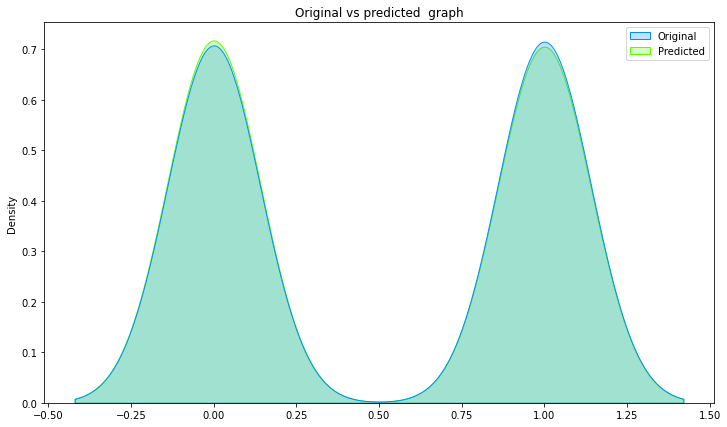

In [204]:
# Viewing the difference of prediction using Visualization 
plt.figure(figsize=(12,7))
sns.kdeplot(data=df_new, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

Obs- The graph clearly shows there is almost complete resemblance between original and predicted results